<a href="https://colab.research.google.com/github/Dhanashri2526/Assignment/blob/main/Computer_Vision_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [22]:
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 8, 6

#Statistical check from header

In [23]:
df = pd.read_csv('gicsd_labels.csv', sep=', ', engine='python')
df.head(5)

,IMAGE_FILENAME,LABEL
0,GICSD_1_0_3.png,FULL_VISIBILITY
1,GICSD_1_0_13.png,FULL_VISIBILITY
2,GICSD_1_1_33.png,PARTIAL_VISIBILITY
3,GICSD_1_1_53.png,FULL_VISIBILITY
4,GICSD_1_2_73.png,FULL_VISIBILITY


In [24]:
df.describe()

,IMAGE_FILENAME,LABEL
count,800,800
unique,800,3
top,GICSD_1_0_3.png,FULL_VISIBILITY
freq,1,646


In [25]:
print('keys: ', df.keys().values)

keys:  ['IMAGE_FILENAME' 'LABEL']


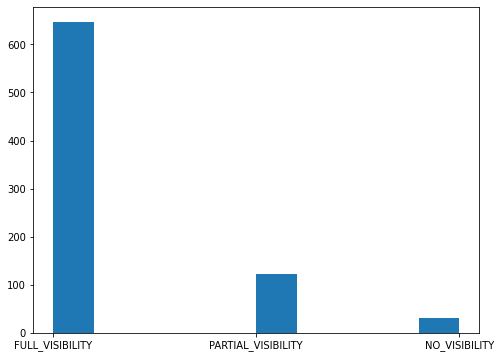

In [26]:
image_files = df['IMAGE_FILENAME']
labels = df['LABEL']
hist = labels.hist(grid=False)

In [27]:
file_name = image_files[0].split('_')
print(file_name)

['GICSD', '1', '0', '3.png']


In [28]:
new_df = []
names = ['card_id', 'bg_id','label']
for row in zip(image_files, labels):
    file_name = row[0].split('_')
    new_df.append(file_name[1:-1] + [row[1]])

new_df = pd.DataFrame(new_df, columns=names)
new_df

,card_id,bg_id,label
0,1,0,FULL_VISIBILITY
1,1,0,FULL_VISIBILITY
2,1,1,PARTIAL_VISIBILITY
3,1,1,FULL_VISIBILITY
4,1,2,FULL_VISIBILITY
...,...,...,...
795,50,7,NO_VISIBILITY
796,50,7,PARTIAL_VISIBILITY
797,50,8,FULL_VISIBILITY
798,50,9,FULL_VISIBILITY


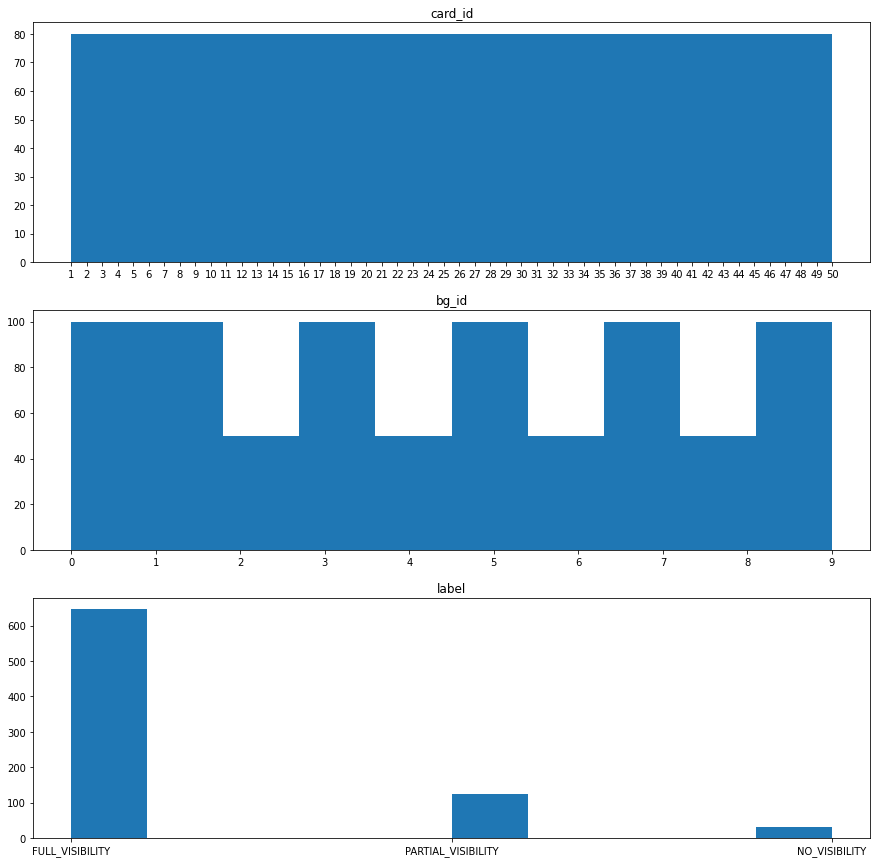

In [29]:
plt.rcParams["figure.figsize"] = 15, 15
for i, x in enumerate(names):
    plt.subplot(3,1,i+1); new_df[x].hist(grid=False); plt.title(x)

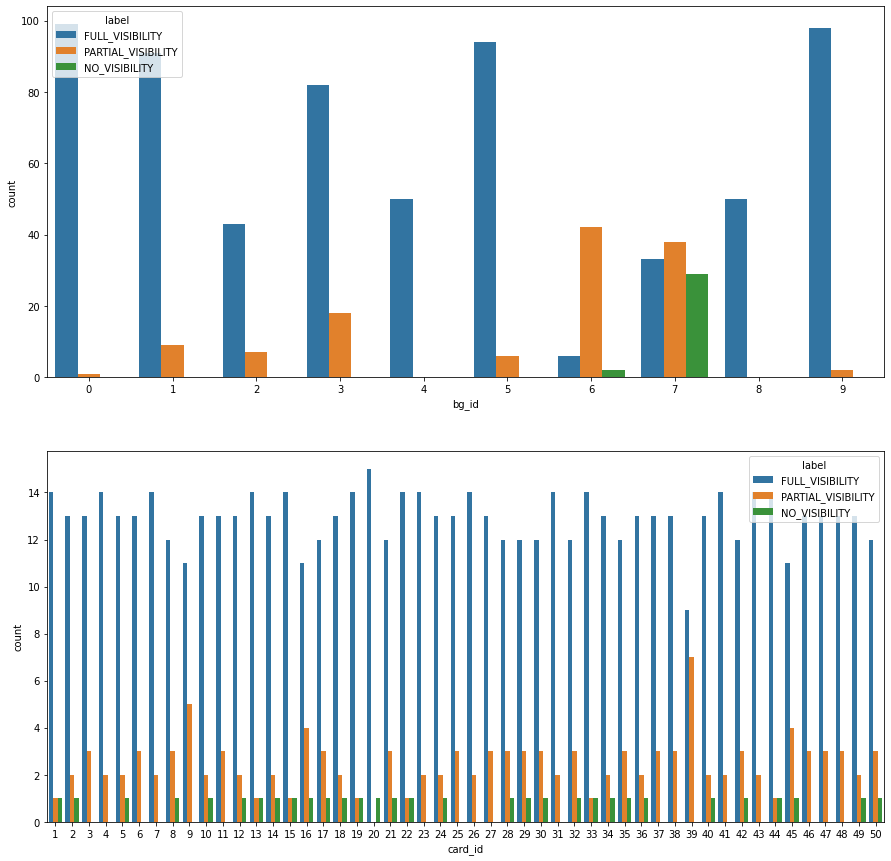

In [30]:
import seaborn as sns
plt.rcParams["figure.figsize"] = 15, 15

plt.subplot(2,1,1); sns.countplot(x='bg_id', hue='label', data=new_df, dodge=True);
plt.subplot(2,1,2); sns.countplot(x='card_id', hue='label', data=new_df, dodge=True);

#Exploring the Images

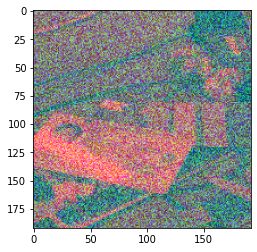

In [31]:
plt.rcParams["figure.figsize"] = 6, 4

file_path = os.path.join('images', image_files[2])
image_bgr = cv2.imread(file_path)
plt.imshow(image_bgr)

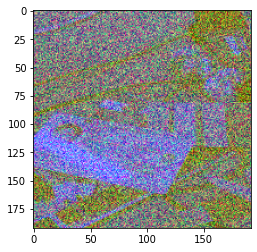

In [32]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

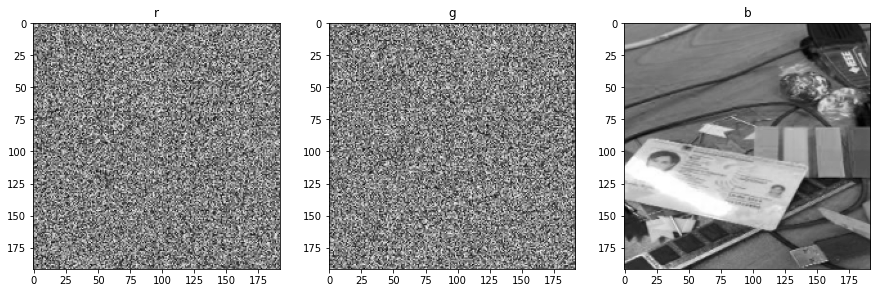

In [33]:

plt.rcParams["figure.figsize"] = 15, 15
channels = ['r', 'g', 'b']
for i, x in enumerate(channels):
    plt.subplot(1,3,i+1), plt.imshow(image_rgb[:,:,i], cmap='gray'); plt.title(x)

In [37]:
pip install PyQt5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.4 MB 3.6 MB/s 
     |████████████████████████████████| 361 kB 65.0 MB/s 
     |████████████████████████████████| 59.9 MB 74.8 MB/s 


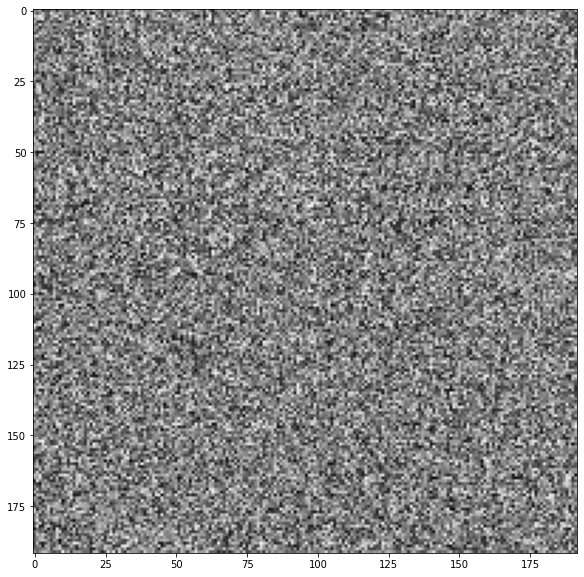

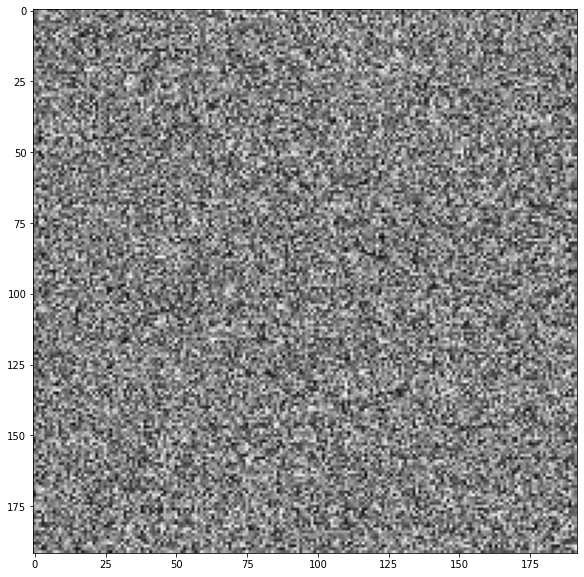

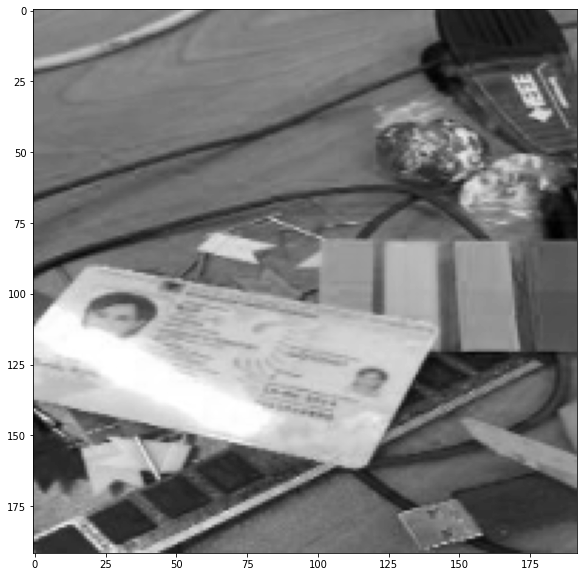

In [40]:
# %matplotlib qt
plt.rcParams["figure.figsize"] = 6, 4
for i, x in enumerate(channels):
    plt.figure(x + ' channel', figsize=(10,10))
    plt.imshow(image_rgb[:,:,i], cmap='gray')

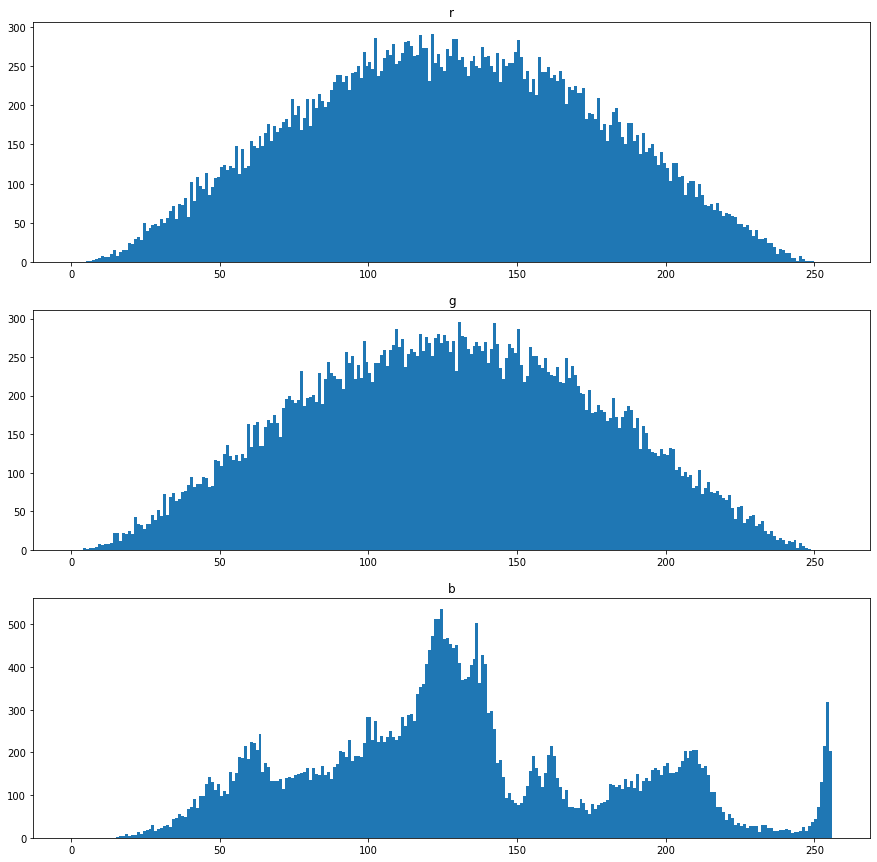

In [41]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 15, 15
for i, x in enumerate(channels):
    plt.subplot(3,1,i+1),plt.hist(image_rgb[:,:,i].ravel(),256,[0,256]); plt.title(x)

#Load some images from dataset

In [46]:
image_files = df['IMAGE_FILENAME']
labels = df['LABEL']

new_data_block = []
names = ['card_id', 'bg_id','label']
for row in zip(image_files, labels):
    file_name = row[0].split('_')
    new_data_block.append(file_name[1:-1] + [row[1]])

new_data_block = np.array(new_data_block)

In [47]:
card_id_set = sorted(list(set(new_data_block[:,0])))
bg_id_set = sorted(list(set(new_data_block[:,1])))
label_set = sorted(list(set(new_data_block[:,2])))
print('Card IDs: ', len(card_id_set), '\nBackground IDs: ', len(bg_id_set), '\nClass: ', len(label_set))

Card IDs:  50 
Background IDs:  10 
Class:  3


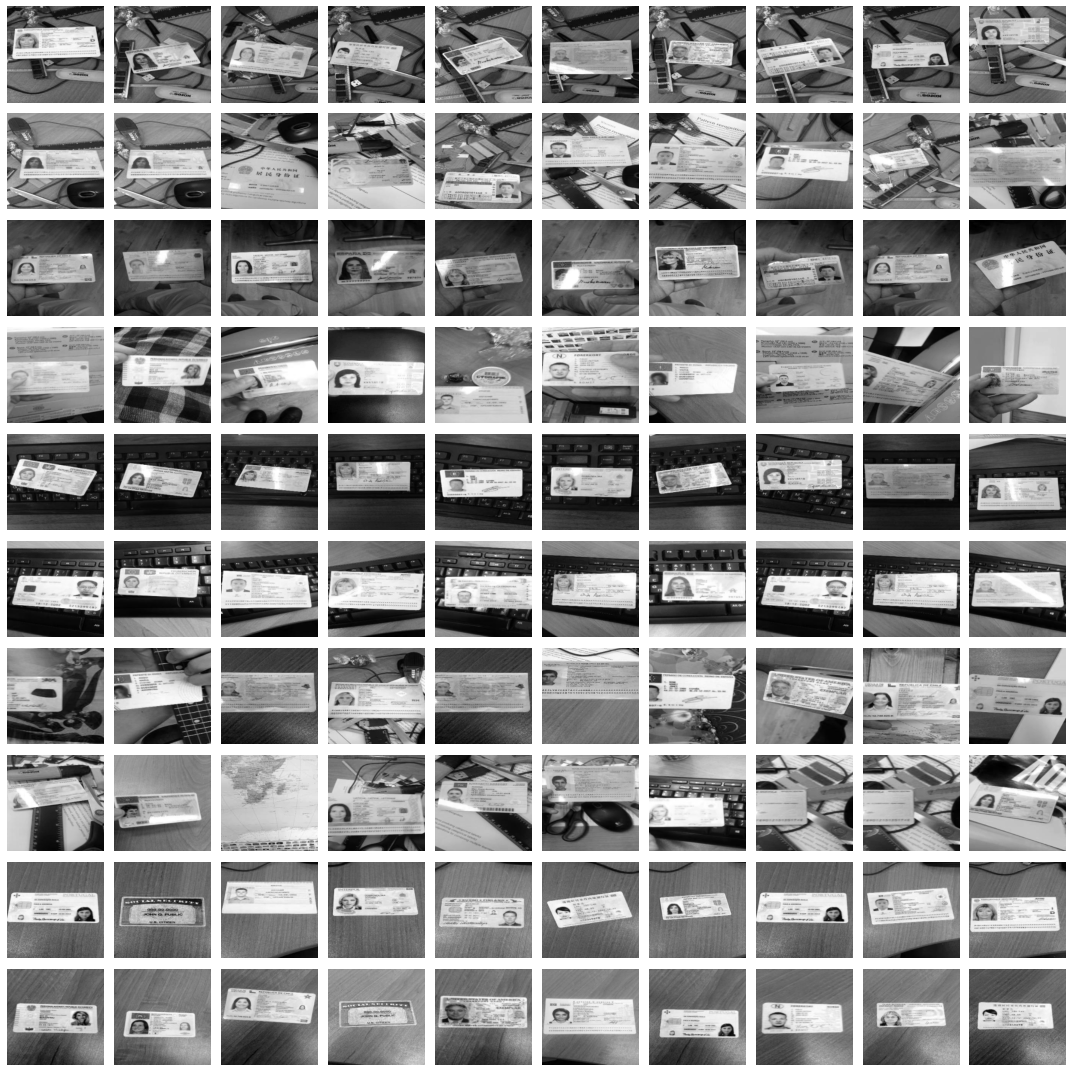

In [48]:
plt.rcParams["figure.figsize"] = 15, 15
i = 1
for bg_id in bg_id_set:
    indexes = np.where(new_data_block[:,1] == bg_id)[0]
    indexes = np.random.choice(indexes, 10)
    plt.tight_layout()
    for idx in indexes:
        file_path = os.path.join('images', image_files[idx])
        image_bgr = cv2.imread(file_path)
        plt.subplot(10,10,i)
        plt.imshow(image_bgr[:,:,0], cmap='gray'); 
        plt.axis('off')
        i += 1



#Input Generation

In [56]:

def header_info_extractor(data_header):
    
    image_files = list(data_header['IMAGE_FILENAME'].values)
    labels = data_header['LABEL'].values.astype(str)
    label_set = sorted(list(set(labels)))
    
    new_data_block = []
    for row in zip(image_files, labels):
        file_name = row[0].split('_')
        new_data_block.append(file_name[1:-1] + [row[1]])    
    new_data_block = np.array(new_data_block)
    
    # chaning labels to numbers can help data processing
    for i, x in enumerate(label_set):
        new_data_block[new_data_block[:,-1] == x,-1] = i
    new_data_block = new_data_block.astype(np.int)
    return new_data_block, image_files, label_set


In [58]:
# testing the function
df = pd.read_csv('gicsd_labels.csv', sep=', ', engine='python')
new_data_block, image_files, classes = header_info_extractor(df)


<ipython-input-56-ec6e618e9f7f>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  new_data_block = new_data_block.astype(np.int)


In [61]:
def load_image(image_file):
    '''
    image_file: file name of the image in dataset
    return: blue channel of the loaded image
    '''
    file_path = os.path.join('images', image_file)
    image_bgr = cv2.imread(file_path)
    return image_bgr[:,:,0]

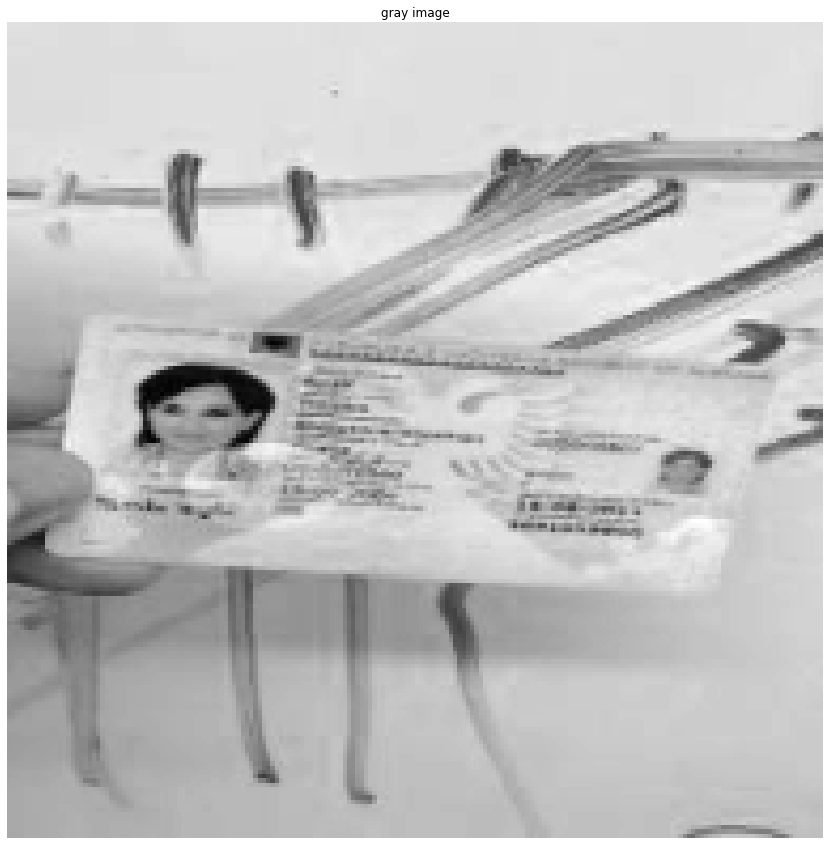

In [62]:
# testing the function
gray_image = load_image(image_files[10])
plt.imshow(gray_image, cmap='gray'); plt.title('gray image'); plt.axis('off');

In [63]:
class CardImageDataset():
    def __init__(self,  header_file='gicsd_labels.csv', image_dir='images'):
        '''
        root_dir: location of the dataset dir
        header_file: location of the dataset header in the dataset directory
        image_dir: location of the images
        '''
        header_path = os.path.join(header_file)
        self.data_header = pd.read_csv(header_path, sep=', ', engine='python')
        self.image_dir = os.path.join(image_dir)
        
        self.header_info, self.image_files, self.classes = self.header_info_extractor()
        self.length = len(self.image_files)
        
    def __len__(self):
        return self.length
        
    def __getitem__(self, idx):
        gray_image = self.load_image(self.image_files[idx])
        label = self.header_info[idx,-1]
        return {'image': gray_image, 'label': label}    
        
    def load_image(self, image_file):
        '''
        image_file: file name of the image in dataset
        return: blue channel of the loaded image
        '''
        file_path = os.path.join(self.image_dir, image_file)
        image_bgr = cv2.imread(file_path)
        return image_bgr[:,:,0]
    
    def header_info_extractor(self):
        ''' 
        data_header: pandas dataframe of loaded csv file which describes the images
        '''
        image_files = list(self.data_header['IMAGE_FILENAME'].values)
        labels = self.data_header['LABEL'].values.astype(str)
        label_set = sorted(list(set(labels)))

        new_data_block = []
        for row in zip(image_files, labels):
            file_name = row[0].split('_')
            new_data_block.append(file_name[1:-1] + [row[1]])    
        new_data_block = np.array(new_data_block)

        # chaning labels to numbers can help data processing
        for i, x in enumerate(label_set):
            new_data_block[new_data_block[:,-1] == x,-1] = i
        new_data_block = new_data_block.astype(np.int)
        return new_data_block, image_files, label_set


<ipython-input-63-3b22bccf37a9>:49: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  new_data_block = new_data_block.astype(np.int)


dataset length:  800


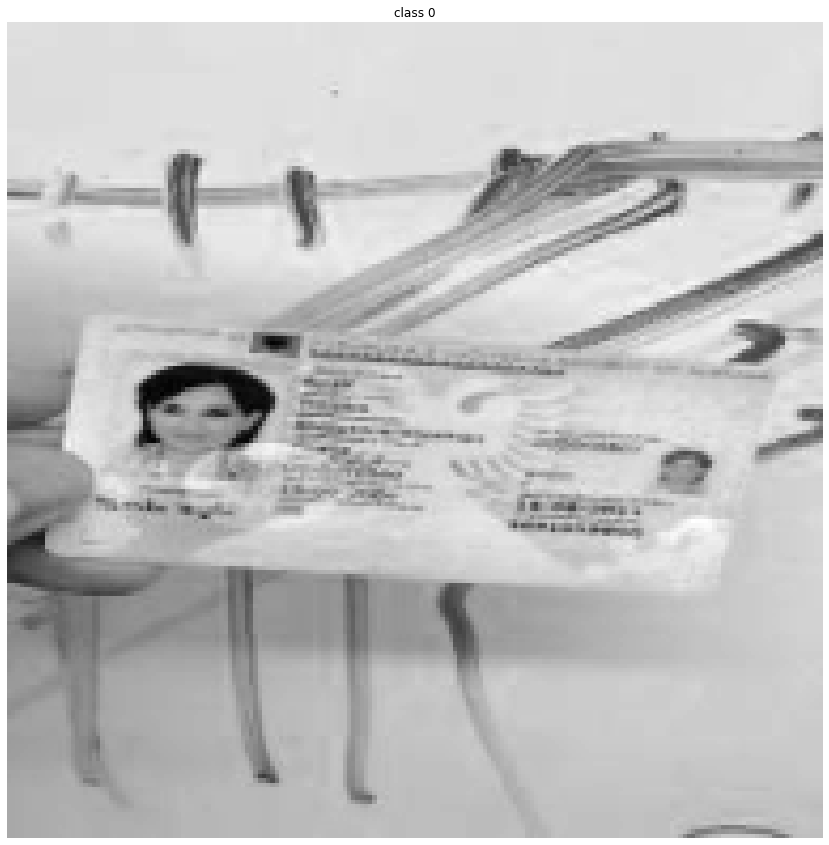

In [64]:
# testing the class
dataset = CardImageDataset(header_file='gicsd_labels.csv', image_dir='images')
print('dataset length: ', len(dataset))
plt.imshow(dataset[10]['image'], cmap='gray'); plt.title('class {}'.format(dataset[10]['label'])); plt.axis('off');


#Model Selection

In [78]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
from pylab import *

In [115]:
mobilenet_feature = models.mobilenet_v2(pretrained=True).features
print(mobilenet_feature[0][0])
print(mobilenet_feature[0][0].weight.shape)
# this is what we have pretrained and loaded

Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
torch.Size([32, 3, 3, 3])


In [116]:
one_Channel = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
print(one_Channel.weight.shape)
# but this is what we need to make the model functional for single-channel input

torch.Size([32, 1, 3, 3])


In [117]:
# so this will give us what we need
one_kernel = mobilenet_feature[0][0].weight[:,2]
one_kernel = torch.unsqueeze(one_kernel, dim=1).data
print(one_kernel.shape)
# now we can change the layer and save the weights
one_Channel.weight.data = one_kernel
mobilenet_feature[0][0] = one_Channel
torch.save(mobilenet_feature.state_dict(), 'modified_mobilenet_v2_features_state_dict.pth')


torch.Size([32, 1, 3, 3])


In [118]:
# let's test, does it load properly and give us the modified model
mobilenet_feature = models.mobilenet_v2(pretrained=True).features
mobilenet_feature[0][0] = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
mobilenet_feature.load_state_dict(torch.load('modified_mobilenet_v2_features_state_dict.pth'))


<All keys matched successfully>

In [123]:
# Dataset class to make loading easy and compatible with pytorch
class CardImageDataset():
    def __init__(self, root_dir='', header_file='gicsd_labels.csv', image_dir='images'):
        '''
        root_dir: location of the dataset dir
        header_file: location of the dataset header in the dataset directory
        image_dir: location of the images
        '''
        header_path = os.path.join(root_dir,header_file)
        self.data_header = pd.read_csv(header_path, sep=', ', engine='python')
        self.image_dir = os.path.join(root_dir,image_dir)
        
        self.header_info, self.image_files, self.classes = self.header_info_extractor()
        self.length = len(self.image_files)
        
    def __len__(self):
        return self.length
        
    def __getitem__(self, idx):
        gray_image = self.load_image(self.image_files[idx])
        label = torch.LongTensor([self.header_info[idx,-1]])
        return {'image': gray_image, 'label': label}
        
    def load_image(self, image_file):
        '''
        image_file: file name of the image in dataset
        return: blue channel of the loaded image
        '''
        file_path = os.path.join(self.image_dir, image_file)
        frame = cv2.imread(file_path)[:,:,0].astype(np.float32)
        frame = torch.from_numpy(frame)
        frame /= 255
        frame = torch.unsqueeze(frame, dim=0)
        frame = transforms.functional.normalize(frame,
                                        mean=[0.406],
                                        std=[0.225])
        return frame
    
    def header_info_extractor(self):
        image_files = list(self.data_header['IMAGE_FILENAME'].values)
        labels = self.data_header['LABEL'].values.astype(str)
        label_set = sorted(list(set(labels)))

        new_data_block = []
        for row in zip(image_files, labels):
            file_name = row[0].split('_')
            new_data_block.append(file_name[1:-1] + [row[1]])    
        new_data_block = np.array(new_data_block)

        # chaning labels to numbers can help data processing
        for i, x in enumerate(label_set):
            new_data_block[new_data_block[:,-1] == x,-1] = i
        new_data_block = new_data_block.astype(np.int)
        return new_data_block, image_files, label_set
  

torch.Size([1, 192, 192])


<ipython-input-123-32549b4cba47>:53: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  new_data_block = new_data_block.astype(np.int)


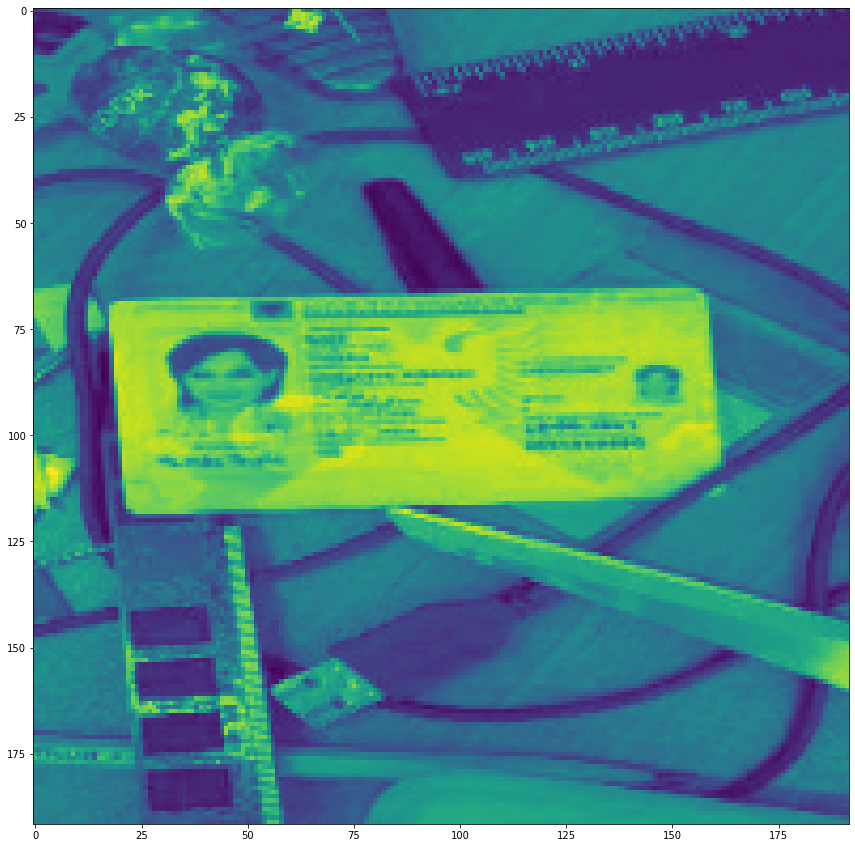

In [124]:
dataset = CardImageDataset( header_file='gicsd_labels.csv', image_dir='images')

test_image = dataset[0]['image']
print(test_image.shape)
plt.imshow(test_image[0])


In [125]:
# try the forward pass of our feature model
test_image = torch.unsqueeze(test_image, dim=0)
with torch.no_grad():
    features = mobilenet_feature(test_image)
print(features.shape)

torch.Size([1, 1280, 6, 6])


#Creating the classification model

In [126]:
from collections import OrderedDict

class CardModel(nn.Module):
    def __init__(self):
        super(CardModel, self).__init__()
        
        self.features = models.mobilenet_v2(pretrained=True).features
        self.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        self.features.load_state_dict(torch.load('modified_mobilenet_v2_features_state_dict.pth'))
        
        self.classifier = nn.Sequential(OrderedDict([
            ('g_pool', nn.AdaptiveMaxPool2d(1)),
            ('flatten', nn.Flatten()),
            ('linear_1', nn.Linear(1280, 512)),
            ('act_1', nn.LeakyReLU()),
            
            ('linear_2', nn.Linear(512, 128)),
            ('act_2', nn.LeakyReLU()),
            
            ('linear_3', nn.Linear(128, 3)),
            ]))
        
        self.loss_1 = nn.CrossEntropyLoss()
    
    def forward(self, x):
        
        x = self.features(x)
        x = self.classifier(x)

        return x


In [127]:
cardNet = CardModel()
test_sample = dataset[0] 
test_image = test_sample['image']
label = test_sample['label']

test_image = torch.unsqueeze(test_image, dim=0)
print(label)
print(test_image.shape)
with torch.no_grad():
    out = cardNet(test_image)
    print('loss: ', cardNet.loss_1(out, label))
print(out.shape)
print(out)

tensor([0])
torch.Size([1, 1, 192, 192])
loss:  tensor(1.1611)
torch.Size([1, 3])
tensor([[0.0573, 0.2150, 0.0798]])


#Feature model revisit

In [128]:
test_image = dataset[0]['image']
test_image_1c = torch.unsqueeze(test_image, dim=0)
print(test_image_1c.shape)

test_image_3c = torch.cat([test_image,test_image,test_image],dim=0)
test_image_3c = torch.unsqueeze(test_image_3c, dim=0)
print(test_image_3c.shape)

torch.Size([1, 1, 192, 192])
torch.Size([1, 3, 192, 192])


In [129]:
mobilenet_feature = models.mobilenet_v2(pretrained=True).features
print(mobilenet_feature[0][0])

out_3c = mobilenet_feature[0][0](test_image_3c)
print(out_3c.shape)

Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
torch.Size([1, 32, 96, 96])


In [130]:
one_Channel = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
one_kernel = mobilenet_feature[0][0].weight[:,2]
one_kernel = torch.unsqueeze(one_kernel, dim=1).data
one_Channel.weight.data = one_kernel

out_1c = one_Channel(test_image_1c)
print(out_1c.shape)

torch.Size([1, 32, 96, 96])


In [132]:
print('1 channel sum: {}\n3 channel sum: {}'.format(out_1c.sum(), out_3c.sum()))
print('1 channel avg: {}\n3 channel avg: {}'.format(out_1c.mean(), out_3c.mean()))
print('1 channel median: {}\n3 channel median: {}'.format(out_1c.median(), out_3c.median()))
print('1 channel std: {}\n3 channel std: {}'.format(out_1c.std(), out_3c.std()))
print('l1 loss: ', nn.functional.l1_loss(out_1c, out_3c))
print('mse loss: ', nn.functional.mse_loss(out_1c, out_3c))

1 channel sum: -1193.08642578125
3 channel sum: -1045.2730712890625
1 channel avg: -0.004045567475259304
3 channel avg: -0.0035443557426333427
1 channel median: 0.0002143416932085529
3 channel median: 0.0010061765788123012
1 channel std: 0.6812583208084106
3 channel std: 0.828816831111908
l1 loss:  tensor(0.5187, grad_fn=<MeanBackward0>)
mse loss:  tensor(0.7811, grad_fn=<MseLossBackward0>)
